In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#I coded a function to compute euclidian distance between whole train array and one line of test array

In [44]:
def euclidean_distance_calculate(x_test, x_train):
    return np.sqrt(np.sum(((x_test-x_train)**2),axis=1))

In [46]:
#I coded a function, which calls euclidean_distance_calculator and checks top k nearest points and returns its prediction

In [45]:
def knn_calculator(x_train, x_test, y_train, k):
    distance = euclidean_distance_calculate(x_test, x_train)

    combined_x_and_y_list = np.column_stack((distance,y_train)).tolist()
    combined_x_and_y_list.sort(key=lambda x:x[0])
    
    top_k_personalities = [second_number for first_number, second_number in combined_x_and_y_list[:k]]
    
    prediction = 0
    for number in set(top_k_personalities):
        if top_k_personalities.count(number) > top_k_personalities.count(prediction):
            prediction = number
    return prediction

In [90]:
#This is main function. It applies cross validation on X1, X2, X3, X4, X5 column partitions It takes two parameters. Test_fold_number
#indicates which fold we are going to use as test. Numbers are 1,2,3,4,5. It takes the number as test fold, other as train folds. Calls 
#knn_calculator function to check if our prediction is true. At the end of the code it computes accuracy, precision, recall depending on 
#the correct and wrong answers.

In [4]:
def main(test_fold_number,k):    
    global accuracy_global,precision_global, recall_global
 
    FN,FP,TP,TN = 0,0,0,0

    number_list = [1,2,3,4,5]
    number_list.remove(test_fold_number)

    X_train = np.concatenate((globals()['X'+str(number_list[0])],globals()['X'+str(number_list[1])],\
                              globals()['X'+str(number_list[2])],globals()['X'+str(number_list[3])]))
    
    Y_train = np.concatenate((globals()['Y'+str(number_list[0])],globals()['Y'+str(number_list[1])],\
                              globals()['Y'+str(number_list[2])],globals()['Y'+str(number_list[3])]))
    
    X_test = globals()['X'+str(test_fold_number)]
    Y_test = globals()['Y'+str(test_fold_number)]
    
    for index in range(X_test.shape[0]):
        if Y_test[index]==int((knn_calculator(X_train ,X_test ,Y_train, k))):
            TP += 1
            TN += 15
        else:
            FN += 1   
            FP += 1

    accuracy = (TP+TN)/(TP+TN+FN+FP)
    precision = (TP)/(TP+FP)
    recall = (TP/(TP+FN))

    accuracy_global += accuracy
    precision_global += precision
    recall_global += recall


    print(f'Fold {test_fold_number}')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print()

In [49]:
#I opened csv_file, dropped 'Response Id' column. Then encoded personality types with the numbers in the dictionary part. Then shuffled.

In [6]:
csv_file = pd.read_csv('16P.csv',encoding='cp1252')

df = pd.DataFrame(csv_file)
df.drop('Response Id',inplace=True,axis=1)

dictionary = {'ESTJ':0, 'ENTJ':1, 'ESFJ':2, 'ENFJ': 3, 'ISTJ': 4, 'ISFJ': 5, 'INTJ': 6, 'INFJ': 7, 'ESTP': 8, 'ESFP': 9, 'ENTP': 10, 'ENFP': 11, 'ISTP': 12, 'ISFP': 13, 'INTP': 14, 'INFP': 15} 

df['Personality'] = df['Personality'].replace(dictionary)

df = df.sample(frac = 1)
print(df.head())

       You regularly make new friends.  \
54155                                0   
41054                               -1   
49497                                0   
28591                               -1   
5257                                 0   

       You spend a lot of your free time exploring various random topics that pique your interest  \
54155                                                  0                                            
41054                                                  0                                            
49497                                                  0                                            
28591                                                  0                                            
5257                                                  -1                                            

       Seeing other people cry can easily make you feel like you want to cry too  \
54155                                                  1

In [50]:
#I simply seperated my columns to 5 folds. 

In [7]:
X1 = df.to_numpy()[:,:-1][:12000]
Y1 = df.to_numpy()[:,-1][:12000]

X2 = df.to_numpy()[:,:-1][12000:24000]
Y2 = df.to_numpy()[:,-1][12000:24000]

X3 = df.to_numpy()[:,:-1][24000:36000]
Y3 = df.to_numpy()[:,-1][24000:36000]

X4 = df.to_numpy()[:,:-1][36000:48000]
Y4 = df.to_numpy()[:,-1][36000:48000]

X5 = df.to_numpy()[:,:-1][48000:]
Y5 = df.to_numpy()[:,-1][48000:]



In [51]:
#Calculation for k=1 Without Feature Normalization.

In [15]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=1 Without Feature Normalization\n')

main(1,1)
main(2,1)
main(3,1)
main(4,1)
main(5,1)

print(f'Averages of k=1')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=1 Without Feature Normalization

Fold 1
Accuracy: 0.997044251174857
Precision: 0.9768333333333333
Recall: 0.9768333333333333

Fold 2
Accuracy: 0.9970659522898329
Precision: 0.977
Recall: 0.977

Fold 3
Accuracy: 0.9971093351470838
Precision: 0.9773333333333334
Recall: 0.9773333333333334

Fold 4
Accuracy: 0.9969791090499085
Precision: 0.9763333333333334
Recall: 0.9763333333333334

Fold 5
Accuracy: 0.9972823779193206
Precision: 0.9786648887407284
Recall: 0.9786648887407284

Averages of k=1
Average Accuracy: 0.9970962051162007
Average Precision: 0.9772329777481458
Average Recall: 0.9772329777481458


In [53]:
#Calculation for k=3 Without Feature Normalization.

In [16]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=3 Without Feature Normalization\n')

main(1,3)
main(2,3)
main(3,3)
main(4,3)
main(5,3)

print(f'Averages of k=3')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=3 Without Feature Normalization

Fold 1
Accuracy: 0.9985691440114468
Precision: 0.9886666666666667
Recall: 0.9886666666666667

Fold 2
Accuracy: 0.9985159925483881
Precision: 0.98825
Recall: 0.98825

Fold 3
Accuracy: 0.9984095720590249
Precision: 0.9874166666666667
Recall: 0.9874166666666667

Fold 4
Accuracy: 0.9985478881242502
Precision: 0.9885
Recall: 0.9885

Fold 5
Accuracy: 0.9986646057432468
Precision: 0.9894157846487207
Recall: 0.9894157846487207

Averages of k=3
Average Accuracy: 0.9985414404972712
Average Precision: 0.9884498235964108
Average Recall: 0.9884498235964108


In [54]:
#Calculation for k=5 Without Feature Normalization.

In [17]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=5 Without Feature Normalization\n')

main(1,5)
main(2,5)
main(3,5)
main(4,5)
main(5,5)

print(f'Averages of k=5')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=5 Without Feature Normalization

Fold 1
Accuracy: 0.9986222563444569
Precision: 0.9890833333333333
Recall: 0.9890833333333333

Fold 2
Accuracy: 0.9986116370061845
Precision: 0.989
Recall: 0.989

Fold 3
Accuracy: 0.9984947209970632
Precision: 0.9880833333333333
Recall: 0.9880833333333333

Fold 4
Accuracy: 0.9986222563444569
Precision: 0.9890833333333333
Recall: 0.9890833333333333

Fold 5
Accuracy: 0.9987388599293762
Precision: 0.9899991665972164
Recall: 0.9899991665972164

Averages of k=5
Average Accuracy: 0.9986179461243075
Average Precision: 0.9890498333194433
Average Recall: 0.9890498333194433


In [55]:
#Calculation for k=7 Without Feature Normalization.

In [18]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=7 Without Feature Normalization\n')

main(1,7)
main(2,7)
main(3,7)
main(4,7)
main(5,7)

print(f'Averages of k=7')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=7 Without Feature Normalization

Fold 1
Accuracy: 0.9986859395532195
Precision: 0.9895833333333334
Recall: 0.9895833333333334

Fold 2
Accuracy: 0.9986222563444569
Precision: 0.9890833333333333
Recall: 0.9890833333333333

Fold 3
Accuracy: 0.9985266259734793
Precision: 0.9883333333333333
Recall: 0.9883333333333333

Fold 4
Accuracy: 0.9986647180662594
Precision: 0.9894166666666667
Recall: 0.9894166666666667

Fold 5
Accuracy: 0.9987812565665055
Precision: 0.9903325277106425
Recall: 0.9903325277106425

Averages of k=7
Average Accuracy: 0.9986561593007842
Average Precision: 0.9893498388754619
Average Recall: 0.9893498388754619


In [56]:
#Calculation for k=9 Without Feature Normalization.

In [19]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=9 Without Feature Normalization\n')

main(1,9)
main(2,9)
main(3,9)
main(4,9)
main(5,9)

print(f'Averages of k=9')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=9 Without Feature Normalization

Fold 1
Accuracy: 0.9986965479544212
Precision: 0.9896666666666667
Recall: 0.9896666666666667

Fold 2
Accuracy: 0.9986541049798116
Precision: 0.9893333333333333
Recall: 0.9893333333333333

Fold 3
Accuracy: 0.9985585168506224
Precision: 0.9885833333333334
Recall: 0.9885833333333334

Fold 4
Accuracy: 0.9986859395532195
Precision: 0.9895833333333334
Recall: 0.9895833333333334

Fold 5
Accuracy: 0.9988236282665323
Precision: 0.9906658888240687
Recall: 0.9906658888240687

Averages of k=9
Average Accuracy: 0.9986837475209214
Average Precision: 0.9895665110981472
Average Recall: 0.9895665110981472


In [57]:
#Here I applied 'Feature Normalization' on my X columns. 

In [8]:
X1 = (X1+3)/6
Y1 = Y1

X2 = (X2+3)/6
Y2 = Y2

X3 = (X3+3)/6
Y3 = Y3

X4 = (X4+3)/6
Y4 = Y4

X5 = (X5+3)/6
Y5 = Y5

In [58]:
#Calculation for k=1 With Feature Normalization.

In [8]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=1 With Feature Normalization\n')

main(1,1)
main(2,1)
main(3,1)
main(4,1)
main(5,1)

print(f'Averages of k=1')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=1 With Feature Normalization

Fold 1
Accuracy: 0.9968051118210862
Precision: 0.975
Recall: 0.975

Fold 2
Accuracy: 0.9972826086956522
Precision: 0.9786666666666667
Recall: 0.9786666666666667

Fold 3
Accuracy: 0.9970225435984688
Precision: 0.9766666666666667
Recall: 0.9766666666666667

Fold 4
Accuracy: 0.9964777457572846
Precision: 0.9725
Recall: 0.9725

Fold 5
Accuracy: 0.9970008295577819
Precision: 0.9765
Recall: 0.9765

Averages of k=1
Average Accuracy: 0.9969177678860547
Average Precision: 0.9758666666666667
Average Recall: 0.9758666666666667


In [59]:
#Calculation for k=3 With Feature Normalization.

In [9]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=3 With Feature Normalization\n')

main(1,3)
main(2,3)
main(3,3)
main(4,3)
main(5,3)

print(f'Averages of k=3')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=3 With Feature Normalization

Fold 1
Accuracy: 0.9981642083939989
Precision: 0.9855
Recall: 0.9855

Fold 2
Accuracy: 0.9985053575563648
Precision: 0.9881666666666666
Recall: 0.9881666666666666

Fold 3
Accuracy: 0.9983563029460109
Precision: 0.987
Recall: 0.987

Fold 4
Accuracy: 0.9982496467660642
Precision: 0.9861666666666666
Recall: 0.9861666666666666

Fold 5
Accuracy: 0.9984415146792469
Precision: 0.9876666666666667
Recall: 0.9876666666666667

Averages of k=3
Average Accuracy: 0.9983434060683372
Average Precision: 0.9869
Average Recall: 0.9869


In [60]:
#Calculation for k=5 With Feature Normalization.

In [10]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=5 With Feature Normalization\n')

main(1,5)
main(2,5)
main(3,5)
main(4,5)
main(5,5)

print(f'Averages of k=5')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=5 With Feature Normalization

Fold 1
Accuracy: 0.9983563029460109
Precision: 0.987
Recall: 0.987

Fold 2
Accuracy: 0.9985903936378363
Precision: 0.9888333333333333
Recall: 0.9888333333333333

Fold 3
Accuracy: 0.9984840828701365
Precision: 0.988
Recall: 0.988

Fold 4
Accuracy: 0.9984415146792469
Precision: 0.9876666666666667
Recall: 0.9876666666666667

Fold 5
Accuracy: 0.9985478881242502
Precision: 0.9885
Recall: 0.9885

Averages of k=5
Average Accuracy: 0.9984840364514962
Average Precision: 0.9880000000000001
Average Recall: 0.9880000000000001


In [61]:
#Calculation for k=7 With Feature Normalization.

In [11]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=7 With Feature Normalization\n')

main(1,7)
main(2,7)
main(3,7)
main(4,7)
main(5,7)

print(f'Averages of k=7')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=7 With Feature Normalization

Fold 1
Accuracy: 0.9983349842982696
Precision: 0.9868333333333333
Recall: 0.9868333333333333

Fold 2
Accuracy: 0.9985691440114468
Precision: 0.9886666666666667
Recall: 0.9886666666666667

Fold 3
Accuracy: 0.9984415146792469
Precision: 0.9876666666666667
Recall: 0.9876666666666667

Fold 4
Accuracy: 0.9984415146792469
Precision: 0.9876666666666667
Recall: 0.9876666666666667

Fold 5
Accuracy: 0.9986116370061845
Precision: 0.989
Recall: 0.989

Averages of k=7
Average Accuracy: 0.9984797589348788
Average Precision: 0.9879666666666667
Average Recall: 0.9879666666666667


In [62]:
#Calculation for k=9 With Feature Normalization.

In [12]:
accuracy_global = 0
precision_global = 0
recall_global = 0

print('Results for k=9 With Feature Normalization\n')

main(1,9)
main(2,9)
main(3,9)
main(4,9)
main(5,9)

print(f'Averages of k=9')
print('Average Accuracy:', accuracy_global/5)
print('Average Precision:', precision_global/5)
print('Average Recall:', recall_global/5)

Results for k=9 With Feature Normalization

Fold 1
Accuracy: 0.9983563029460109
Precision: 0.987
Recall: 0.987

Fold 2
Accuracy: 0.9985691440114468
Precision: 0.9886666666666667
Recall: 0.9886666666666667

Fold 3
Accuracy: 0.9984628019120217
Precision: 0.9878333333333333
Recall: 0.9878333333333333

Fold 4
Accuracy: 0.9984628019120217
Precision: 0.9878333333333333
Recall: 0.9878333333333333

Fold 5
Accuracy: 0.9985903936378363
Precision: 0.9888333333333333
Recall: 0.9888333333333333

Averages of k=9
Average Accuracy: 0.9984882888838674
Average Precision: 0.9880333333333333
Average Recall: 0.9880333333333333


In [74]:
#Error Analysis for Classification

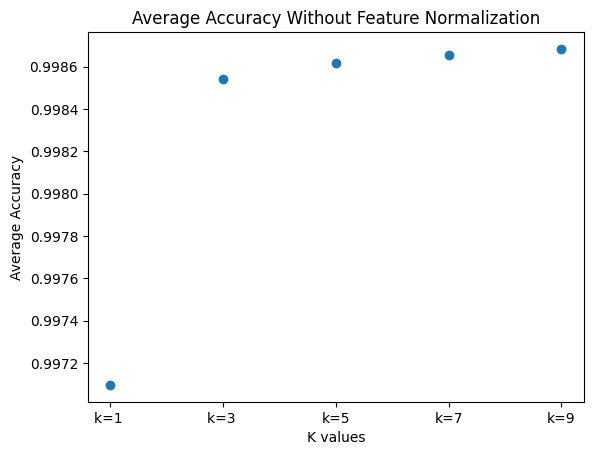

In [71]:
x = np.array(['k=1 ','k=3 ','k=5', 'k=7', 'k=9'])
y = np.array([0.9970962051162007,0.9985414404972712,0.9986179461243075,0.9986561593007842,0.9986837475209214])

plt.xlabel("K values")
plt.ylabel("Average Accuracy")

plt.title('Average Accuracy Without Feature Normalization')


plt.scatter(x, y)
plt.show()

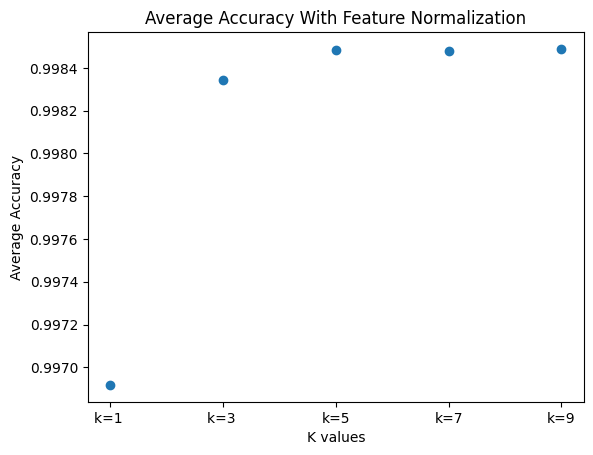

In [70]:
x = np.array(['k=1 ','k=3 ','k=5', 'k=7', 'k=9'])
y = np.array([0.9969177678860547,0.9983434060683372,0.9984840364514962,0.9984797589348788,0.9984882888838674])

plt.xlabel("K values")
plt.ylabel("Average Accuracy")

plt.title('Average Accuracy With Feature Normalization')

plt.scatter(x, y)
plt.show()

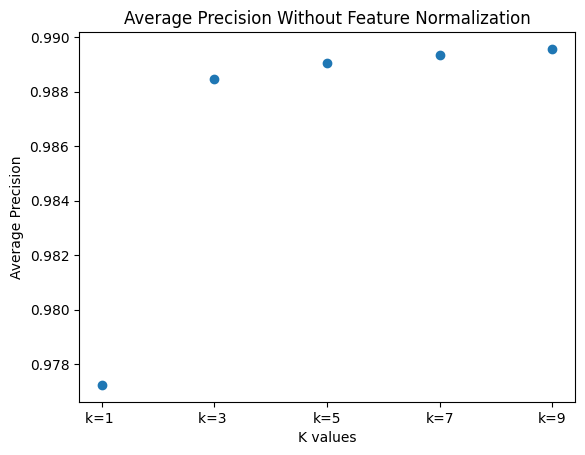

In [69]:
x = np.array(['k=1 ','k=3 ','k=5', 'k=7', 'k=9'])
y = np.array([0.9772329777481458, 0.9884498235964108,0.9890498333194433, 0.9893498388754619,0.9895665110981472])

plt.xlabel("K values")
plt.ylabel("Average Precision")

plt.title('Average Precision Without Feature Normalization')


plt.scatter(x, y)
plt.show()

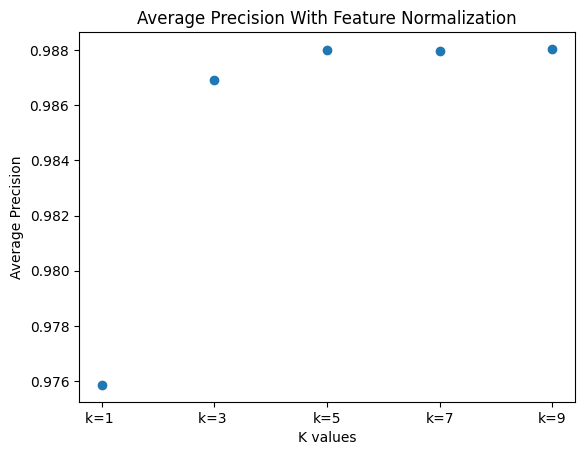

In [68]:
x = np.array(['k=1 ','k=3 ','k=5', 'k=7', 'k=9'])
y = np.array([ 0.9758666666666667,0.9869, 0.9880000000000001,0.9879666666666667, 0.9880333333333333])

plt.xlabel("K values")
plt.ylabel("Average Precision")

plt.title('Average Precision With Feature Normalization')


plt.scatter(x, y)
plt.show()

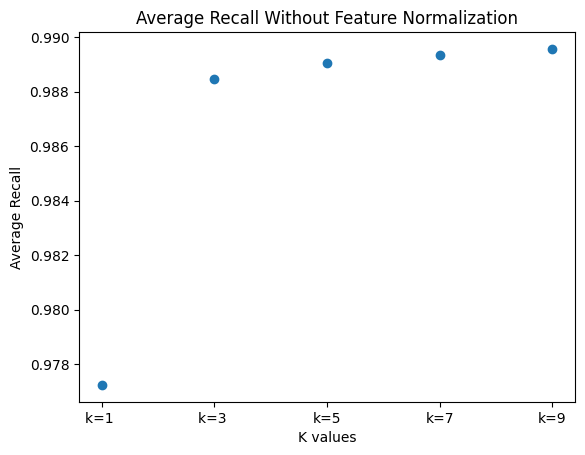

In [67]:
x = np.array(['k=1 ','k=3 ','k=5', 'k=7', 'k=9'])
y = np.array([0.9772329777481458, 0.9884498235964108,0.9890498333194433, 0.9893498388754619,0.9895665110981472])

plt.xlabel("K values")
plt.ylabel("Average Recall")

plt.title('Average Recall Without Feature Normalization')


plt.scatter(x, y)
plt.show()

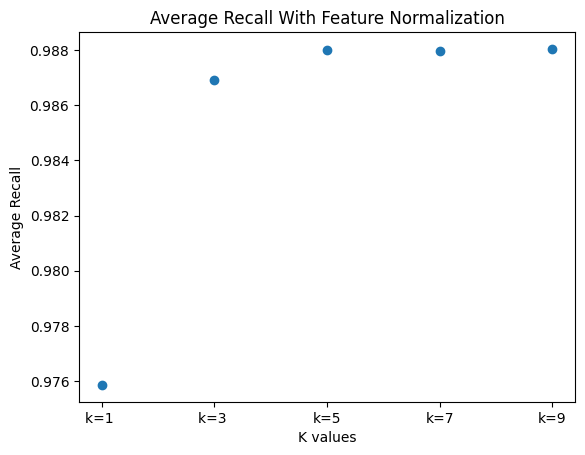

In [66]:
x = np.array(['k=1 ','k=3 ','k=5', 'k=7', 'k=9'])
y = np.array([ 0.9758666666666667,0.9869, 0.9880000000000001,0.9879666666666667, 0.9880333333333333])

plt.xlabel("K values")
plt.ylabel("Average Recall")

plt.title('Average Recall With Feature Normalization')


plt.scatter(x, y)
plt.show()

In [82]:
#As we can see from above graphs our accuracy, precision and recall values can vary depending on the k value. They are so close to each other but k=1 is the least efficient all of them.
#K=5 and K=9 are the most efficient ones.

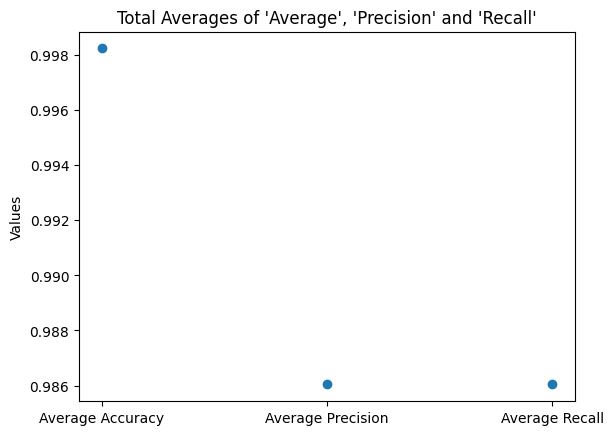

In [89]:
x = ['Average Accuracy','Average Precision','Average Recall']
y = [0.9982308756784122,0.9860415651304276,0.9860415651304276]
plt.ylabel("Values")

plt.title("Total Averages of 'Average', 'Precision' and 'Recall'")


plt.scatter(x, y)
plt.show()

In [86]:
#Total accuracy is the highest with 0.998 among precision and recall. Average precision and average recall have same value, it is interesting.